<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-03-17 06:04:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.1MB/s    in 2.5s    

2025-03-17 06:04:07 (60.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [15]:
QUERY = "SELECT COUNT(*) FROM main"

# Execute the query
df_count = pd.read_sql_query(QUERY, conn)

# Display the result
print(df_count)



   COUNT(*)
0     65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [16]:
QUERY = """
SELECT name AS Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""

# Execute the query
df_tables = pd.read_sql_query(QUERY, conn)

# Display the result
print(df_tables)



  Table_Name
0       main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [17]:
QUERY = """
SELECT Age, COUNT(*) AS count
FROM main
GROUP BY Age
ORDER BY Age
"""

# Execute the query
df_age_group = pd.read_sql_query(QUERY, conn)

# Display the result
print(df_age_group)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [18]:
QUERY = """
SELECT sql FROM sqlite_master 
WHERE name = 'main'
"""

# Execute the query
df_schema = pd.read_sql_query(QUERY, conn)

# Display the schema
print(df_schema.iat[0, 0])



CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


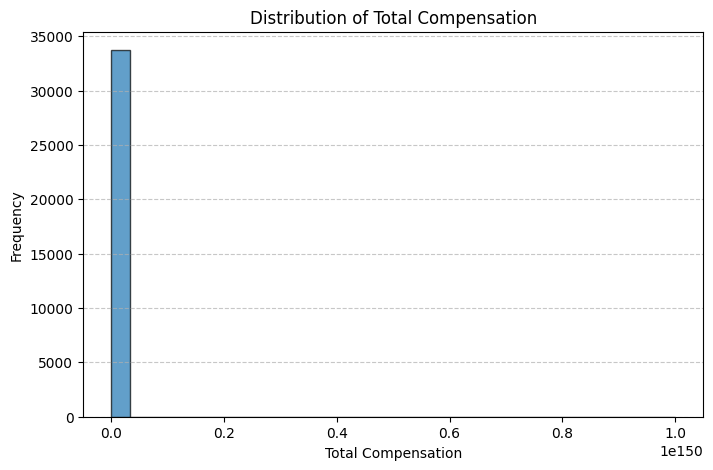

In [19]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch CompTotal from the database
QUERY = """
SELECT CompTotal 
FROM main
"""

# Read data into a DataFrame
df_comp = pd.read_sql_query(QUERY, conn)

# Drop NaN values to avoid errors
df_comp.dropna(inplace=True)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df_comp['CompTotal'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Box Plots**

Plot a box plot of Age.


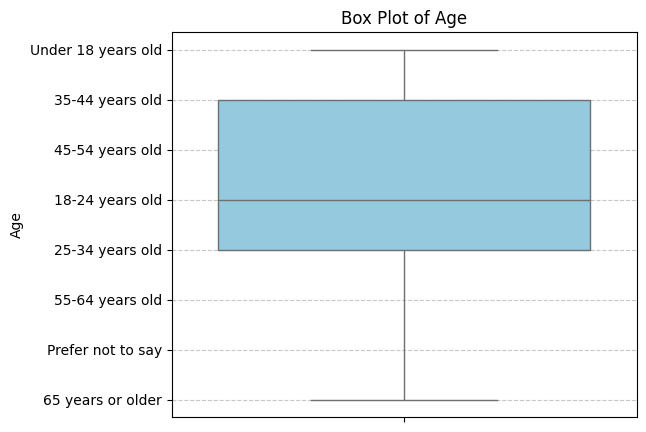

In [20]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Query to fetch Age from the database
QUERY = """
SELECT Age 
FROM main
"""

# Read data into a DataFrame
df_age = pd.read_sql_query(QUERY, conn)

# Drop NaN values to avoid errors
df_age.dropna(inplace=True)

# Plot box plot
plt.figure(figsize=(6, 5))
sns.boxplot(y=df_age['Age'], color='skyblue')
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


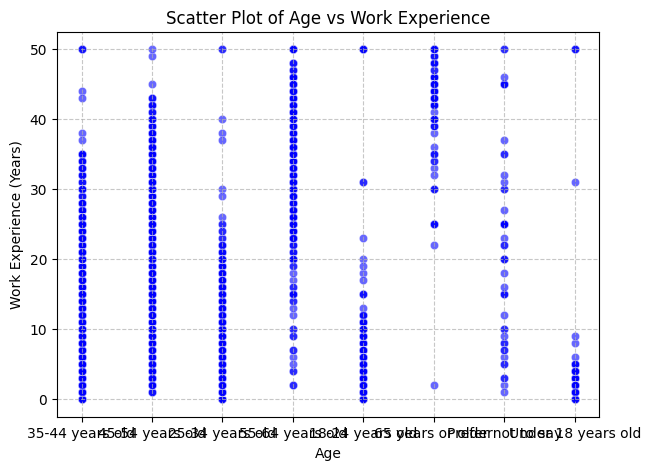

In [21]:
## Write your code here
QUERY = """
SELECT Age, WorkExp 
FROM main
"""

# Read data into a DataFrame
df_scatter = pd.read_sql_query(QUERY, conn)

# Drop NaN values to ensure proper plotting
df_scatter.dropna(inplace=True)

# Plot scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_scatter, x='Age', y='WorkExp', color='blue', alpha=0.6)

# Labels and title
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.title('Scatter Plot of Age vs Work Experience')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


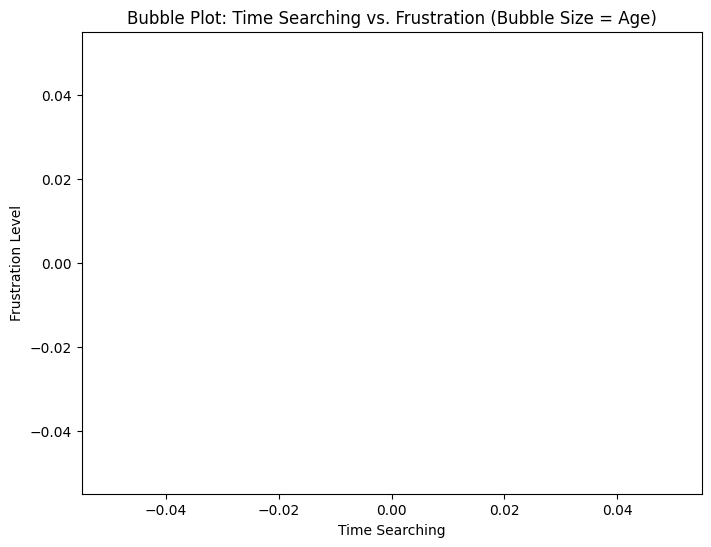

In [23]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch TimeSearching, Frustration, and Age from the database
QUERY = """
SELECT TimeSearching, Frustration, Age 
FROM main
"""

# Read data into a DataFrame
df_bubble = pd.read_sql_query(QUERY, conn)

# Drop NaN values and ensure Age is numeric
df_bubble = df_bubble.dropna().copy()
df_bubble['Age'] = pd.to_numeric(df_bubble['Age'], errors='coerce')  # Convert to numeric
df_bubble = df_bubble.dropna()  # Drop any remaining NaN values

# Ensure Age has valid values
df_bubble = df_bubble[df_bubble['Age'] > 0]  # Remove invalid ages if needed

# Plot bubble plot
plt.figure(figsize=(8, 6))
plt.scatter(df_bubble['TimeSearching'], df_bubble['Frustration'], 
            s=df_bubble['Age'] * 5,  # Scale the Age column for bubble size
            alpha=0.5, color='blue', edgecolors='black')

# Labels and title
plt.xlabel('Time Searching')
plt.ylabel('Frustration Level')
plt.title('Bubble Plot: Time Searching vs. Frustration (Bubble Size = Age)')

# Show the plot
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


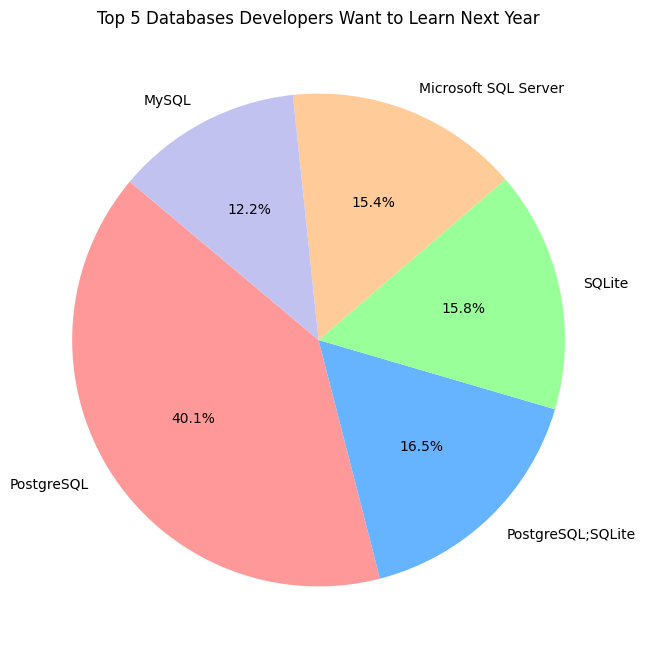

In [24]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch the database column from the survey data
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main
"""

# Read the data into a Pandas DataFrame
df_db = pd.read_sql_query(QUERY, conn)

# Split multiple databases per respondent (assuming values are comma-separated)
df_db = df_db.dropna()  # Remove NaN values
df_db_expanded = df_db['DatabaseWantToWorkWith'].str.split(',', expand=True).stack().reset_index(drop=True)

# Count occurrences of each database
db_counts = df_db_expanded.value_counts()

# Select the **top 5** databases
top_5_databases = db_counts.head(5)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Add title
plt.title('Top 5 Databases Developers Want to Learn Next Year')

# Show the chart
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


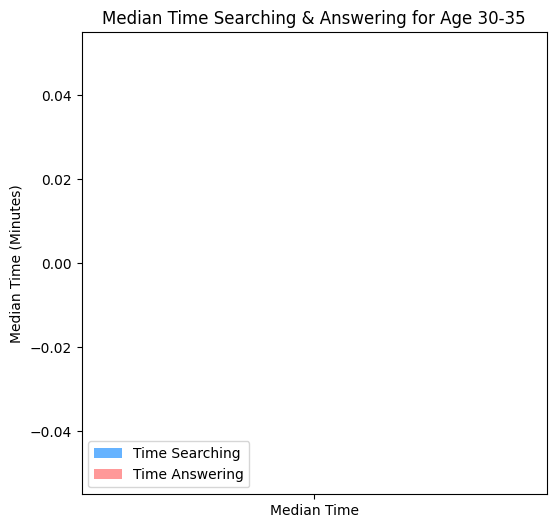

In [25]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Query to fetch relevant data from the database
QUERY = """
SELECT Age, TimeSearching, TimeAnswering
FROM main
WHERE Age BETWEEN 30 AND 35
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Calculate median values
median_time_searching = df["TimeSearching"].median()
median_time_answering = df["TimeAnswering"].median()

# Data for the bar chart
categories = ['Median Time']
values_searching = [median_time_searching]
values_answering = [median_time_answering]

# Create a stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar(categories, values_searching, label="Time Searching", color="#66b3ff")
plt.bar(categories, values_answering, label="Time Answering", bottom=values_searching, color="#ff9999")

# Labels and title
plt.ylabel("Median Time (Minutes)")
plt.title("Median Time Searching & Answering for Age 30-35")
plt.legend()

# Show the chart
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


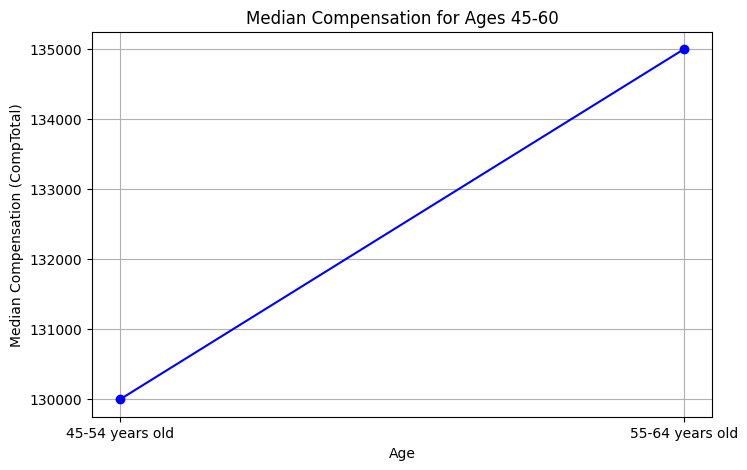

In [26]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch relevant data from the database
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age BETWEEN 45 AND 60
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Compute median compensation per age group
median_comp = df.groupby("Age")["CompTotal"].median().reset_index()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp["Age"], median_comp["CompTotal"], marker="o", linestyle="-", color="b")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Median Compensation (CompTotal)")
plt.title("Median Compensation for Ages 45-60")
plt.grid(True)

# Show the chart
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


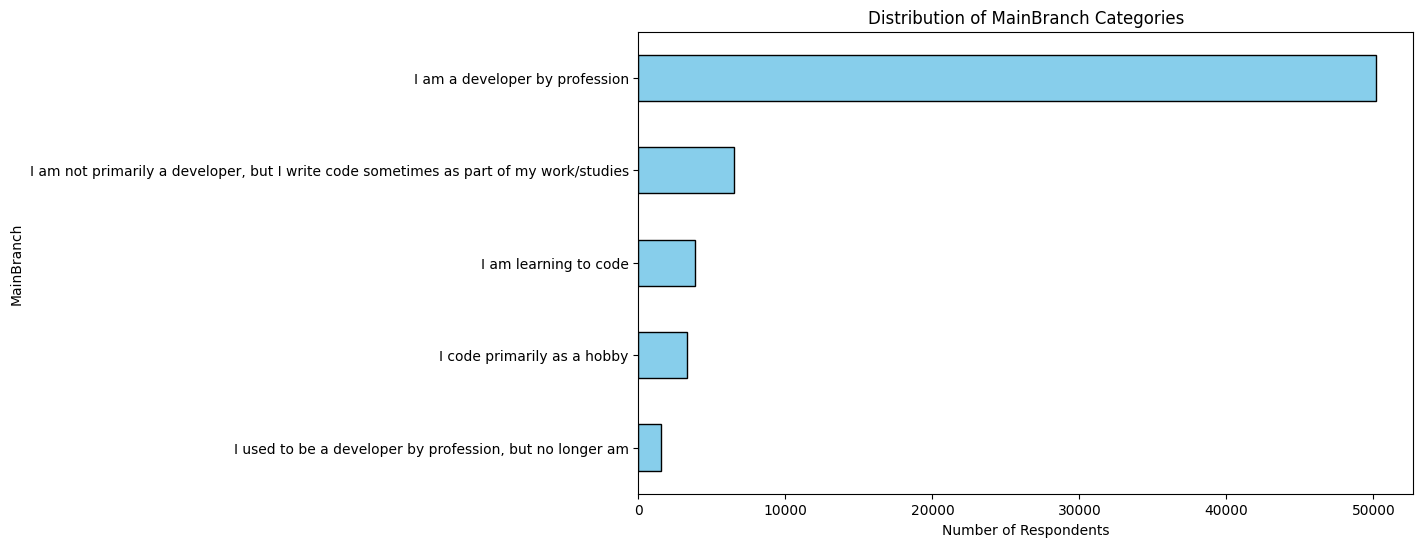

In [27]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query to fetch MainBranch data
QUERY = """
SELECT MainBranch
FROM main
"""

# Read the data into a Pandas DataFrame
df = pd.read_sql_query(QUERY, conn)

# Count occurrences of each category
branch_counts = df["MainBranch"].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
branch_counts.plot(kind="barh", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Number of Respondents")
plt.ylabel("MainBranch")
plt.title("Distribution of MainBranch Categories")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the chart
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [28]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
